# Praktikum 1

## Mathematical Modeling of the Atmosphere

2.1 Draw $N$ random points from a uniform distribution spanning $(0,1)$.

In [201]:
import numpy as np


def draw(n: int):
    from numpy import random
    return random.uniform(size=n)

2.2 Then transform those points to a univariate standard normal distribution, $\mathcal{N}(0,1)$, by using the inverse cumulative distribution function of a standard normal. To do so in python, you can use, e.g., the ``norm.ppf`` function in the ``scypy.stats`` library.

In [202]:
def transform(points):
    from scipy.stats import norm
    return norm.ppf(points)

3 Transform the $N$ points from the standard normal distribution to a normal distribution with mean 0 and standard deviation $\sigma$.

In [203]:
def sigma_transform(sigma: float, points):
    return sigma * points

4 Write a python function that computes $f(x)$.

In [204]:
def f(x, m):
    import numpy as np
    return np.heaviside(x, 1) * np.power(x, m)

5 Compute the integral $I$ using simple Monte Carlo integration with $N$ sample points. Call the estimator $\hat{I}_N$.

In [205]:
def simple_monte_carlo(points, f, m):
    import numpy as np
    return np.average(f(points, m))

6 Write a python function that computes the root-mean-square error in the integration,
$$ \text{RSME}_N = \sqrt{\mathbb{E}((\hat{I}_N - I)^2)}$$
To do this, re-compute $\hat{I}_N$ $\frac{1024}{N}$ times, with a different random seed each time.

Analytical Integral:
$$ \Gamma(m+2) \cdot \frac{(2{\sigma}^2)^{(\frac{m+1}{2})}}{\sqrt{\pi}}$$

In [206]:
def analytical_integral(m, sigma):
    from scipy.special import gamma
    import numpy as np
    return gamma(m + 2) * np.power(2 * np.power(sigma, 2), (m + 1) / 2) / np.sqrt(np.pi)

In [207]:
def root_mean_square_error(n, f, m, sigma, analytical_value):
    import numpy as np
    i_n = 0
    for i in range(int(1024 // n)):
        i_n += simple_monte_carlo(sigma_transform(sigma, transform(draw(n))), f, m)
    return np.sqrt((i_n - analytical_value) ** 2)

7 Write a python driver function that inputs the number of samples, $N$, and outputs $\text{RSME}_N$.

In [208]:
def rsme_driver(n):
    # assuming m = 1, sigma = 1
    return root_mean_square_error(n=n, f=f, m=1, sigma=1, analytical_value=1)

8 Run the driver function with values of $N$: 4, 16, 64, 256, 1024.

In [209]:
n_i = [4, 16, 64, 256, 1024]
for n in n_i:
    print('RSME_N for n =', n, ' : ', rsme_driver(n))

RSME_N for n = 4  :  107.3229053458962
RSME_N for n = 16  :  24.17103909971159
RSME_N for n = 64  :  4.979451074147841
RSME_N for n = 256  :  0.5912681939732582
RSME_N for n = 1024  :  0.5927407912189444


9 Use matplotlib to write a function that plots $\text{RSME}_N$ as a function of $N$ on log-log axes. Does the convergence rate go as $\frac{1}{\sqrt{N}}$?

C:\Users\sberg\AppData\Local\Temp\ipykernel_17280\1110265006.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  for i in range(int(1024 // n)):
C:\Users\sberg\AppData\Local\Temp\ipykernel_17280\258253955.py:8: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(y, 1/np.sqrt(y), label='1/sqrt(n)')


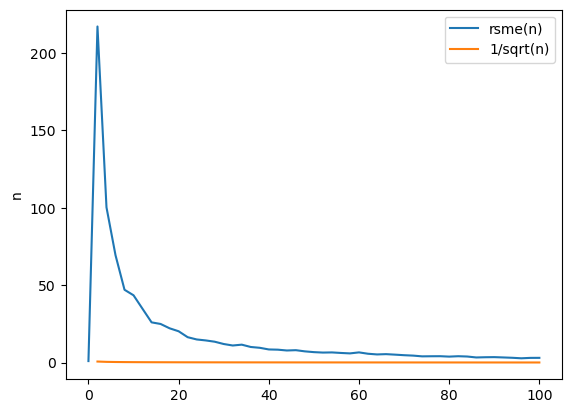

In [220]:
from matplotlib import pyplot as plt
import numpy as np

y = np.arange(0, 101, 2)
x = np.fromiter([rsme_driver(n) for n in y], dtype=float)
fig, ax = plt.subplots()
ax.plot(y, x, label='rsme(n)')
ax.plot(y, 1/np.sqrt(y), label='1/sqrt(n)')
ax.set_ylabel('n')
ax.legend()
plt.show()